# KNN (이진분류)
---
- citrus data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
df = pd.read_csv("/content/drive/MyDrive/SKT FLY AI/2주차/citrus.csv")

In [77]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [68]:
# 데이터의 shape
df.shape

(10000, 6)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [70]:
df.name.unique()

array(['orange', 'grapefruit'], dtype=object)

In [71]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [72]:
# 결측치(Missing value)

df.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [73]:
df.name.value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [98]:
df = df.sample(frac =1)
df.head(10)

,name,diameter,weight,red,green,blue
6188,grapefruit,10.62,183.46,156,58,13
1608,orange,7.90,144.19,159,80,2
7879,grapefruit,11.69,201.17,147,57,19
6552,grapefruit,10.86,187.98,149,53,18
6556,grapefruit,10.87,188.01,139,50,4
6039,grapefruit,10.48,181.57,146,67,21
5445,grapefruit,9.82,171.60,153,69,2
568,orange,6.95,130.84,151,92,13
2100,orange,8.23,148.97,158,90,29
547,orange,6.93,130.45,170,76,9


In [99]:
df.reset_index(drop=True, inplace=True)
df

,name,diameter,weight,red,green,blue
0,grapefruit,10.62,183.46,156,58,13
1,orange,7.90,144.19,159,80,2
2,grapefruit,11.69,201.17,147,57,19
3,grapefruit,10.86,187.98,149,53,18
4,grapefruit,10.87,188.01,139,50,4
...,...,...,...,...,...,...
9995,grapefruit,13.06,221.37,157,61,7
9996,grapefruit,11.22,193.83,159,73,25
9997,grapefruit,12.56,214.02,168,54,19
9998,orange,9.48,168.20,149,76,19


In [120]:
# 테스트 데이터 분리

X = df.loc[:7999]
y = df.loc[8000:]

In [117]:
X

,name,diameter,weight,red,green,blue
0,grapefruit,10.62,183.46,156,58,13
1,orange,7.90,144.19,159,80,2
2,grapefruit,11.69,201.17,147,57,19
3,grapefruit,10.86,187.98,149,53,18
4,grapefruit,10.87,188.01,139,50,4
...,...,...,...,...,...,...
7995,grapefruit,10.50,181.80,143,89,13
7996,orange,7.79,142.14,176,74,6
7997,orange,8.20,148.54,173,82,2
7998,orange,8.19,148.41,162,80,2


In [121]:
y

,name,diameter,weight,red,green,blue
8000,orange,7.87,143.73,145,87,16
8001,orange,8.37,150.84,155,83,6
8002,grapefruit,10.92,188.98,171,69,30
8003,orange,7.49,137.99,168,69,2
8004,grapefruit,11.30,195.19,148,80,32
...,...,...,...,...,...,...
9995,grapefruit,13.06,221.37,157,61,7
9996,grapefruit,11.22,193.83,159,73,25
9997,grapefruit,12.56,214.02,168,54,19
9998,orange,9.48,168.20,149,76,19


# 전처리

스케일링

In [147]:
X.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [148]:
X_target = X.name
X_train = X[['diameter', 'weight', 'red', 'green', 'blue']]

In [149]:
X_target

0       grapefruit
1           orange
2       grapefruit
3       grapefruit
4       grapefruit
           ...    
7995    grapefruit
7996        orange
7997        orange
7998        orange
7999    grapefruit
Name: name, Length: 8000, dtype: object

In [150]:
X_train

,diameter,weight,red,green,blue
0,10.62,183.46,156,58,13
1,7.90,144.19,159,80,2
2,11.69,201.17,147,57,19
3,10.86,187.98,149,53,18
4,10.87,188.01,139,50,4
...,...,...,...,...,...
7995,10.50,181.80,143,89,13
7996,7.79,142.14,176,74,6
7997,8.20,148.54,173,82,2
7998,8.19,148.41,162,80,2


# 평균 및 분산을 통해 Z정규화

In [151]:
u_dia = X_train.diameter.mean()
std_dia = X_train.diameter.std()
X_train.diameter = (X_train.diameter - u_dia )/std_dia

<ipython-input-151-20b9ae9e183a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.diameter = (X_train.diameter - u_dia )/std_dia


In [152]:
u_wei = X_train.weight.mean()
std_wei = X_train.weight.std()
X_train.weight = (X_train.weight - u_wei )/std_wei

<ipython-input-152-7de1ec988aee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.weight = (X_train.weight - u_wei )/std_wei


In [153]:
u_r = X_train.red.mean()
std_r = X_train.red.std()
X_train.red = (X_train.red - u_r )/std_r

<ipython-input-153-af9162887f7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.red = (X_train.red - u_r )/std_r


In [154]:
u_g = X_train.green.mean()
std_g = X_train.green.std()
X_train.green = (X_train.green - u_g )/std_g

<ipython-input-154-ddc5e8fc4fb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.green = (X_train.green - u_g )/std_g


In [155]:
u_b = X_train.blue.mean()
std_b = X_train.blue.std()
X_train.blue = (X_train.blue - u_b )/std_b

<ipython-input-155-db2495ad9551>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.blue = (X_train.blue - u_b )/std_b


In [156]:
X_train

,diameter,weight,red,green,blue
0,0.333416,0.290576,0.205745,-1.544606,0.177122
1,-1.064225,-1.054454,0.491651,0.338238,-1.034816
2,0.883224,0.897159,-0.651973,-1.630190,0.838179
3,0.456738,0.445390,-0.461369,-1.972525,0.728003
4,0.461876,0.446418,-1.414389,-2.229277,-0.814464
...,...,...,...,...,...
7995,0.271756,0.233720,-1.033181,1.108492,0.177122
7996,-1.120747,-1.124668,2.111786,-0.175265,-0.594112
7997,-0.910073,-0.905462,1.825879,0.509406,-1.034816
7998,-0.915211,-0.909915,0.777557,0.338238,-1.034816


In [159]:
X_target = X_target.map({'grapefruit': 0, 'orange':1})
X_target

0       0
1       1
2       0
3       0
4       0
       ..
7995    0
7996    1
7997    1
7998    1
7999    0
Name: name, Length: 8000, dtype: int64

# 학습
- K-nn 알고리즘

In [160]:
type(X_train),type(X_target)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [162]:
# Numpy array 형식으로 변환
X_train = X_train.values
X_target = X_target.values

In [164]:
# 베이스 모델 학습
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(X_train,X_target)

In [166]:
y_target = y.name
y_train = y[['diameter','weight','red','green','blue']]
y_train

,diameter,weight,red,green,blue
8000,7.87,143.73,145,87,16
8001,8.37,150.84,155,83,6
8002,10.92,188.98,171,69,30
8003,7.49,137.99,168,69,2
8004,11.30,195.19,148,80,32
...,...,...,...,...,...
9995,13.06,221.37,157,61,7
9996,11.22,193.83,159,73,25
9997,12.56,214.02,168,54,19
9998,9.48,168.20,149,76,19


In [167]:
y_target = y_target.map({'grapefruit': 0, 'orange':1})

In [168]:
y_train.diameter = (y_train.diameter - u_dia )/std_dia

<ipython-input-168-19abe6357d54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.diameter = (y_train.diameter - u_dia )/std_dia


In [169]:
y_train.weight = (y_train.weight - u_wei )/std_wei

<ipython-input-169-ab3ceb1917af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.weight = (y_train.weight - u_wei )/std_wei


In [170]:
y_train.red = (y_train.red - u_r )/std_r

<ipython-input-170-2f442bb55bd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.red = (y_train.red - u_r )/std_r


In [171]:
y_train.green = (y_train.green - u_g )/std_g

<ipython-input-171-4e1709eb3677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.green = (y_train.green - u_g )/std_g


In [172]:
y_train.blue = (y_train.blue - u_b )/std_b

<ipython-input-172-e2bd5b51ba98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.blue = (y_train.blue - u_b )/std_b


In [175]:
y_train = y_train.values

In [176]:
y_target = y_target.values

In [177]:
# 예측 진행

y_pred = clf.predict(y_train)

In [180]:
y_pred[:20]

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [181]:
y_target[:20]

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

# 평가

In [182]:
# 정확도 평가

np.sum(y_pred == y_target) / len(y_pred)

0.9205

In [185]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_target, y_pred)
cf

array([[929,  73],
       [ 86, 912]])

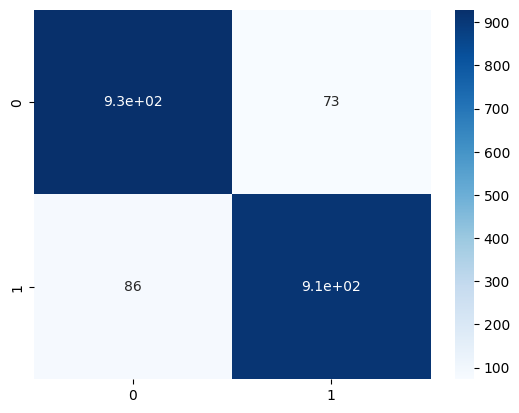

In [186]:
s = sns.heatmap(cf, annot = True,cmap='Blues')

In [192]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score


acc = accuracy_score(y_target,y_pred) # 정답값, 예측값
recall = recall_score(y_target,y_pred) # 정답값, 예측값
precision = precision_score(y_target,y_pred) # 정답값, 예측값
f1 = f1_score(y_target,y_pred) # 정답값, 예측값

print(f'accuracy : {acc}')
print(f'recall : {round(recall,3)}')
print(f'precision : {round(precision,3)}')
print(f'f1 : {round(f1,3)}')

accuracy : 0.9205
recall : 0.914
precision : 0.926
f1 : 0.92


# 모델 튜닝

In [195]:
score = []

for k in range(3,100):
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(X_train,X_target)
  y_pred = clf.predict(y_train)
  acc = accuracy_score(y_target,y_pred) # 정답값, 예측값
  score.append(acc)
print(f'max_accuracy: {max(score)}')

max_accuracy: 0.9355


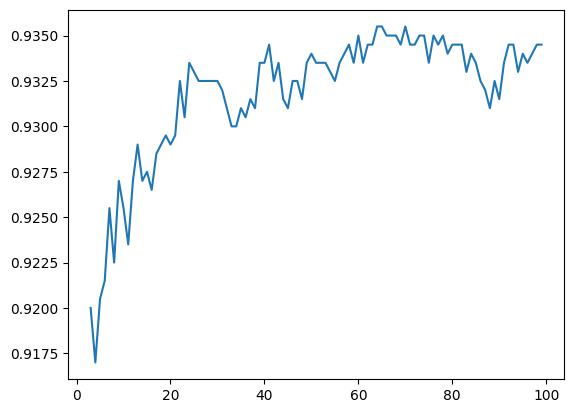

In [198]:
plt.plot(range(3,100),score)
plt.show()

In [199]:
# k가 특정 N(40)일 때가 베스트라 가정, 재학습을 진행

best_clf = KNeighborsClassifier(n_neighbors = 60)
best_clf.fit(X_train,X_target)
y_pred = best_clf.predict(y_train)
acc = accuracy_score(y_target,y_pred) # 정답값, 예측

print(f'optimal_accuracy: {acc}')

optimal_accuracy: 0.935
